In [10]:
from torchvision import datasets
from torchvision.transforms import transforms, functional 
import torch 
import torch.nn as nn

Resolution of the first image: (1920, 1080)


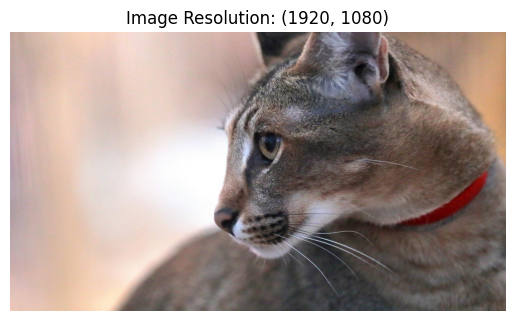

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

train_dir = "/kaggle/input/cats-and-dogs-image-classification/train/cats"

# List all files in the directory
files = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir) if fname.endswith('.jpg') or fname.endswith('.png')]

# Check the resolution of the first image
if files:
    first_image_path = files[0]
    with Image.open(first_image_path) as img:
        print(f"Resolution of the first image: {img.size}")
        
        #Plot the image
        plt.imshow(img)
        plt.title(f"Image Resolution: {img.size}")
        plt.axis("off")
        plt.show()
else:
    print("No images found in the directory.")


In [4]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor()           
])


In [6]:
train_dir = "/kaggle/input/cats-and-dogs-image-classification/train"
train_dataset = datasets.ImageFolder(root = train_dir, transform = transform)

Original resolution of the first image: (1920, 1080)
Transformed resolution: (128, 128)


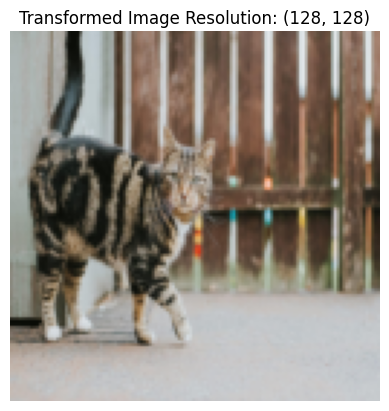

In [7]:
# Load the first image from the dataset
image, label = train_dataset[0]

# Convert the tensor back to a PIL image for display
image_pil = transforms.ToPILImage()(image)

# Print the original resolution
original_image_path = os.path.join(train_dir, train_dataset.classes[label], os.listdir(os.path.join(train_dir, train_dataset.classes[label]))[0])
with Image.open(original_image_path) as img:
    print(f"Original resolution of the first image: {img.size}")

# Print the transformed resolution
print(f"Transformed resolution: {image_pil.size}")

# Plot the transformed image
plt.imshow(image_pil)
plt.title(f"Transformed Image Resolution: {image_pil.size}")
plt.axis('off')  # Hide the axis
plt.show()

# Binary classification model

As a deep learning practitioner, one of your main tasks is training models for image classification. You often encounter binary classification, where you need to distinguish between two classes. To streamline your workflow and ensure reusability, you have decided to create a template for a binary image classification CNN model, which can be applied to future projects.

The package torch and torch.nn as nn have been imported. All image sizes are 64x64 pixels.

* Create a convolutional layer with 3 channels, 16 output channels, kernel size of 3, stride of 1, and padding of 1.
* Create a fully connected layer with an input size of 16x32x32 and a number of classes equal to 1; include only the values in the provided order (16*32*32, 1).
* Create a sigmoid activation function.

In [8]:
class BinaryImageClassifier(nn.Module):
    def __init__(self):
        super(BinaryImageClassifier, self).__init__()
        
        # Create a convolutional layer
        self.conv1 = nn.Conv2d(3, 16, kernel_size =3, stride =1, padding = 1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        
        # Create a fully connected layer
        self.fc = nn.Linear(16*128*128, 1)
        
        # Create an activation function
        self.sigmoid = nn.Sigmoid()

 Notice that the fully connected (fc) layer has an input size of 16x32x32. This is due to the original image input size being 64x64. After passing through the max pooling layer, the spatial dimensions are reduced in half, resulting in 32x32

Notice that the fully connected (fc) layer has an input size of 16x128x128. This is due to the original image input size being 128x128. After passing through the max pooling layer, the spatial dimensions are reduced in half, resulting in 64*64

# Multi-class classification model

With a template for a binary classification model in place, you can now build on it to design a multi-class classification model. The model should handle different numbers of classes via a parameter, allowing you to tailor the model to a specific multi-class classification task in the future.

The case assumed is alll image sizes are 64x64 pixels.

* Define the __init__ method including self and num_classes as parameters.
* Create a fully connected layer with the input size of 16*32*32 and the number of classes num_classes as output.
* Create an activation function softmax with dim=1.

In [9]:
class MultiClassImageClassifier(nn.Module):
  
    # Define the init method
    def __init__(self, num_classes):
        super(MultiClassImageClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()

        # Create a fully connected layer
        self.fc = nn.Linear(16*32*32, num_classes)
        
        # Create an activation function
        self.softmax =nn.Softmax(dim = 1)

**Conv2d: Input Channels**

In [12]:
import PIL 

img = PIL.Image.open("/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_114.jpg")
num_channels = functional.get_image_num_channels(img)
print("Number of Channels :", num_channels)

Number of Channels : 3


# Adding a new convolutional layer

Your project lead provided you with a new CNN model. Let's take a look at the model's architecture and append a new convolutional layer to it.

The model is available as CNNModel. The packages torch and torch.nn as nn have been imported.

* Instantiate a model from the CNNModel class and access the convolutional layers.
* Create a new convolutional layer with in_channels equal to existing layer's out_channels, out_channels set to 32, and stride and padding both set to 1, and assign it to conv2.
* Append the new layer to the model, calling it "conv2".

In [19]:
class Net_Conv(nn.Module):
    def __init__(self):
        super(Net_Conv, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3, padding =1)
        

In [20]:
conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, padding =1, stride = 1)

In [22]:
model1 = Net_Conv()
model1.add_module('conv2',conv2)
print(model1)

Net_Conv(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


**Creating a sequential block**

You decided to redesign your binary CNN model template by creating a block of convolutional layers. This will help you stack multiple layers sequentially. With this improved model, you will be able to easily design various CNN architectures.

* In the __init__() method, define a block of convolutional layers and assign it to self.conv_block.
* In the forward() pass, pass the inputs through the convolutional block you defined.

In [ ]:
class BinaryImageClassification(nn.Module):
    def __init__(self):
    super(BinaryImageClassification, self).__init__()
    # Create a convolutional block
    self.conv_block = nn.Sequential(
      nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
    )

    def forward(self, x):
    # Pass inputs through the convolutional block
    x = self.conv_block(x)
    return x

With this knowledge, you can now efficiently stack multiple layers to build complex CNN architectures for various image processing tasks.